In [2]:
import sys
stdout = sys.stdout
reload(sys)
sys.setdefaultencoding('utf-8')
sys.stdout = stdout

import matplotlib.pyplot as plt
import matplotlib
plt.style.use('classic')
matplotlib.rcdefaults()

import matplotlib.pylab as pylab
params = {'axes.labelsize': 'x-large',
          'axes.titlesize': 'x-large',
          'xtick.labelsize': 'x-large',
          'ytick.labelsize': 'x-large'}
pylab.rcParams.update(params)
%pylab inline
%matplotlib inline

from astropy.io import fits

Populating the interactive namespace from numpy and matplotlib


# Benchmark different avenues in 70 & 350 $\mu$m fits
### 1. Cold component flux ratio from coarser resolution fits (ignore background)

Use the 25$''$ fitting results (PACS 160, SPIRE 250/350, LABOCA+Planck 870 $\mu$m) to extrapolate 'cold' 70 $\mu$m flux and generate a cold component flux ratio map by dividing the observed 70 $\mu$m (smoothed to 25$''$) with the extrapolated one. The ratio map is then regarded as scaling factor to the 10$''$ 70$\mu$m flux map in the final fits. 

The caveat is a coarser resolution ratio map to some degree degrades the angular resolution. But the contribution from cold component should not change drastically around the compact sources. How to estimate the degradation though? 
In some regions surroundding the brightest sources (such as G31.4, W51) the ratio can be larger than 1, which are associated with diffuse bright 70$\mu$m emission which might either be filtered by PACS observations or the poorly calibrated PACS 70$\mu$m flux. But this affect little the compact sources and their immediate periphery which we are interested in.

We took a faint and a bright source for this comparison.

__AG11.11-0.11, AG12.8-0.2__

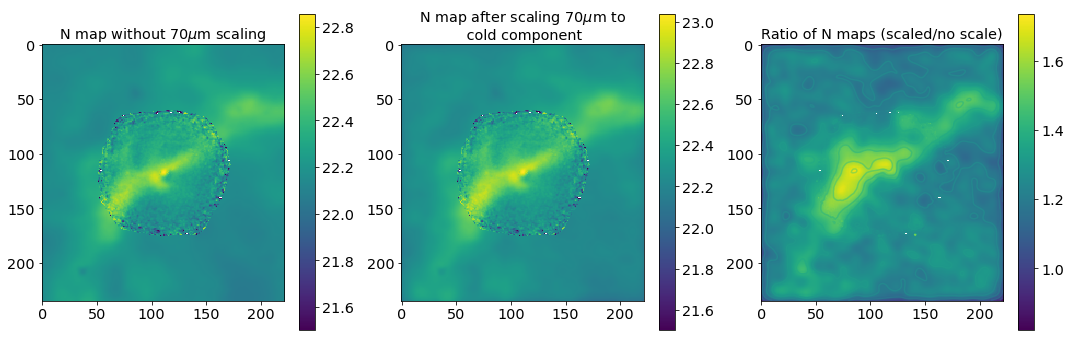

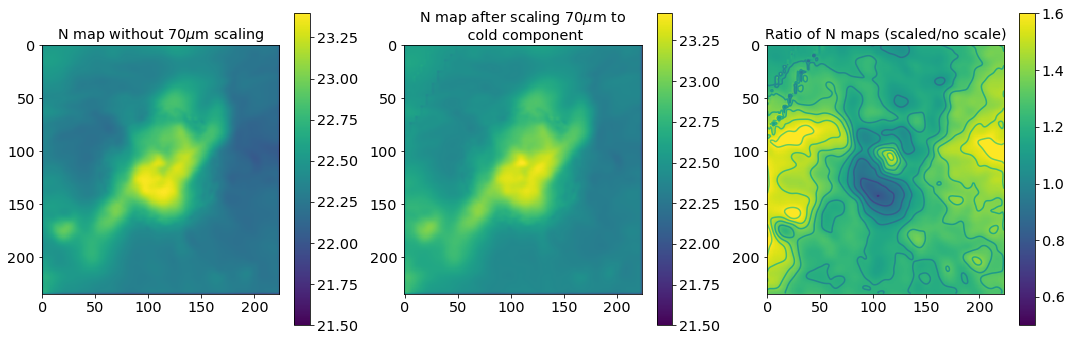

In [99]:
#%%
N_orig = fits.getdata(r'/Users/yuxinlin/saboca_sources/last_ali/AG11.11-0.11_NH2_7_35.fits')
N_e = fits.getdata(r'/Users/yuxinlin/saboca_sources/last_ali/AG11.11-0.11_NH2_7_35enve.fits')

fig, axs = plt.subplots(1,3, figsize=(15, 5), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace =0.01, wspace=0.01)
axs = axs.ravel()

im=axs[0].imshow(N_orig,vmin=21.5)
axs[0].set_title('N map without 70$\mu$m scaling')
plt.colorbar(im, ax=axs[0])
im1 = axs[1].imshow(N_e,vmin=21.5)
axs[1].set_title('N map after scaling 70$\mu$m to\n cold component')
#axs[1].contour(np.power(10,N_e)/np.power(10,N_orig),levels=np.arange(0.6,2.0,0.1))

plt.colorbar(im1, ax=axs[1])

im2 = axs[2].imshow(np.power(10,N_e)/np.power(10,N_orig))
axs[2].set_title('Ratio of N maps (scaled/no scale)')
axs[2].contour(np.power(10,N_e)/np.power(10,N_orig),levels=np.arange(0.6,2.0,0.1))

plt.colorbar(im2, ax=axs[2])
plt.tight_layout()
#plt.suptitle('Emission maps in same colorscale\n',x=0.35,y=1.03,size=20)

N_orig = fits.getdata(r'/Users/yuxinlin/saboca_sources/last_ali/AG12.8-0.2_NH2_7_35.fits')
N_e = fits.getdata(r'/Users/yuxinlin/saboca_sources/last_ali/AG12.8-0.2_NH2_7_35enve.fits')

fig, axs = plt.subplots(1,3, figsize=(15, 5), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace =0.01, wspace=0.01)
axs = axs.ravel()

im=axs[0].imshow(N_orig,vmin=21.5)
axs[0].set_title('N map without 70$\mu$m scaling')
plt.colorbar(im, ax=axs[0])
im1 = axs[1].imshow(N_e,vmin=21.5)
axs[1].set_title('N map after scaling 70$\mu$m to\n cold component')


plt.colorbar(im1, ax=axs[1])

im2 = axs[2].imshow(np.power(10,N_e)/np.power(10,N_orig),vmin=0.5,vmax=1.6)
axs[2].set_title('Ratio of N maps (scaled/no scale)')
axs[2].contour(np.power(10,N_e)/np.power(10,N_orig),levels=np.arange(0.6,2.0,0.1))
plt.colorbar(im2, ax=axs[2])
plt.tight_layout()
#plt.suptitle('Emission maps in same colorscale\n',x=0.35,y=1.03,size=20)


__Comparison between column density maps derived by original 70/350 $\mu$m vs. scaled 70 and 350 $\mu$m maps.__
The ratio maps in the right panel include contour levels from 0.6 to 2 by 0.1, and the same contour are also overlaid in second column density maps.

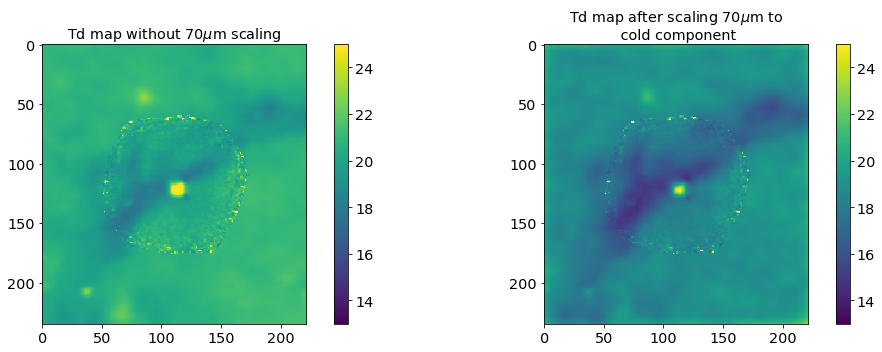

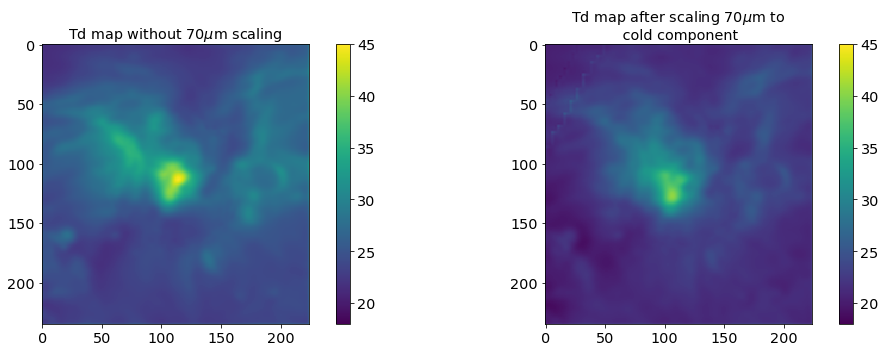

In [105]:
#%%
T_orig = fits.getdata(r'/Users/yuxinlin/saboca_sources/last_ali/AG11.11-0.11_Td_7_35.fits')
T_e = fits.getdata(r'/Users/yuxinlin/saboca_sources/last_ali/AG11.11-0.11_Td_7_35enve.fits')

fig, axs = plt.subplots(1,2, figsize=(15, 5), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace =0.01, wspace=0.01)
axs = axs.ravel()

im=axs[0].imshow(T_orig,vmin=13,vmax=25)
axs[0].set_title('Td map without 70$\mu$m scaling')
plt.colorbar(im, ax=axs[0])
im1 = axs[1].imshow(T_e,vmin=13,vmax=25)
axs[1].set_title('Td map after scaling 70$\mu$m to\n cold component')
#axs[1].contour(np.power(10,N_e)/np.power(10,N_orig),levels=np.arange(0.6,2.0,0.1))

plt.colorbar(im1, ax=axs[1])
plt.tight_layout()
#plt.suptitle('Emission maps in same colorscale\n',x=0.35,y=1.03,size=20)

T_orig = fits.getdata(r'/Users/yuxinlin/saboca_sources/last_ali/AG12.8-0.2_Td_7_35.fits')
T_e = fits.getdata(r'/Users/yuxinlin/saboca_sources/last_ali/AG12.8-0.2_Td_7_35enve.fits')

fig, axs = plt.subplots(1,2, figsize=(15, 5), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace =0.01, wspace=0.01)
axs = axs.ravel()

im=axs[0].imshow(T_orig,vmin=18, vmax=45)
axs[0].set_title('Td map without 70$\mu$m scaling')
plt.colorbar(im, ax=axs[0])
im1 = axs[1].imshow(T_e,vmin=18, vmax=45)
axs[1].set_title('Td map after scaling 70$\mu$m to\n cold component')


plt.colorbar(im1, ax=axs[1])

plt.tight_layout()
#plt.suptitle('Emission maps in same colorscale\n',x=0.35,y=1.03,size=20)

__In the following we compare the flux ratio of 70$\mu$m cold vs. total emission directly.__

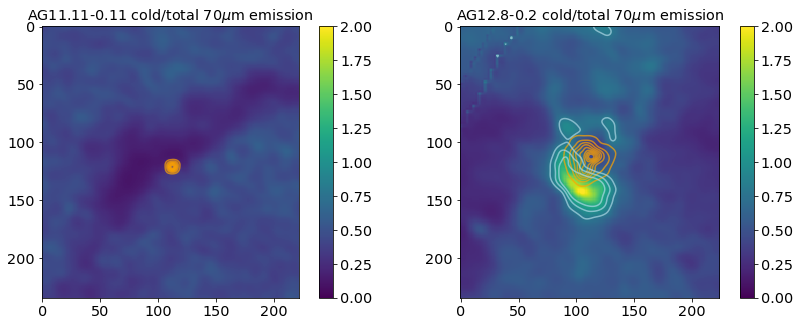

In [82]:
scale_f1 = fits.getdata(r'/Users/yuxinlin/saboca_sources/last_ali/AG12.8-0.2_70scalefactor.fits',0)
scale_f2 = fits.getdata(r'/Users/yuxinlin/saboca_sources/last_ali/AG11.11-0.11_70scalefactor.fits',0)

orig_70_2 = fits.getdata(r'/Users/yuxinlin/saboca_sources/final_sed_70_cb350/AG11.11-0.11_all/AG11.11-0.11_70hcongrid.fits')
orig_70_1 = fits.getdata(r'/Users/yuxinlin/saboca_sources/final_sed_70_cb350/AG12.8-0.2_all/AG12.8-0.2_70hcongrid.fits')
peak_1 = np.nanmax(orig_70_1)
peak_2 = np.nanmax(orig_70_2)

fig, axs = plt.subplots(1,2, figsize=(15, 5), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace =0.01, wspace=0.01)
axs = axs.ravel()

im=axs[0].imshow(scale_f2,vmin=0,vmax=2.)
axs[0].set_title('AG11.11-0.11 cold/total 70$\mu$m emission')
axs[0].contour(orig_70_2, levels=np.arange(0.1,1.,0.1)*peak_2,colors='orange',alpha=0.7)
axs[0].contour(scale_f2, levels=[0.8,1,1.2],colors='lightblue',alpha=0.7)

plt.colorbar(im, ax=axs[0])
im1 = axs[1].imshow(scale_f1, vmin=0., vmax=2.)
axs[1].set_title('AG12.8-0.2 cold/total 70$\mu$m emission')
axs[1].contour(orig_70_1, levels=np.arange(0.1,1.,0.1)*peak_1,colors='orange',alpha=0.7)
axs[1].contour(scale_f1, levels=[0.8,1.,1.2],colors='lightblue',alpha=0.7)

plt.colorbar(im1, ax=axs[1])


#plt.suptitle('Emission maps in same colorscale\n',x=0.35,y=1.03,size=20)


__Color scale shows the flux ratio of extrapolated 'cold'and original 70$\mu$m flux. The orange contours correspond to original 70$\mu$m emission from 0.1x-1.0x peak flux. The light blue contour marks the ratio=0.8,1,1.2 region.__
It can be seen that the extrapolated 'cold' 70$\mu$m flux has ~2 times larger flux surrounding the compact bright source.

__Now we compare the combined 350 $\mu$m map with the derived different column density maps.__

In [ ]:
dirpath = r'/Users/yuxinlin/saboca_sources/SPIRE_cut/SPIRE_350/temp/'
f_350_1 = fits.getdata(dirpath+r'AG11.11-0.11_miriad_merge_1027.fits_sm10.fits')
f_350_2 = fits.getdata(dirapth+r'AG12.8-0.2_miriad_merge_1027.fits_sm10.fits')

### 2. Considering 70 $\mu$m background contribution (median filter method from Butler & Tan 2012)